#**Демонстрация работы модели детекции негативного контента**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import load_model
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.image as mpimg
import cv2

In [2]:
from tensorflow.keras.optimizers import SGD

model = load_model("detector.h5", compile=False)
optimizer = SGD(learning_rate=3.162277789670043e-05)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (224, 224, 3))
    np_image = np.expand_dims(np_image, axis=0)
    img=mpimg.imread(filename)
    plt.imshow(img)
    return np_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Neutral


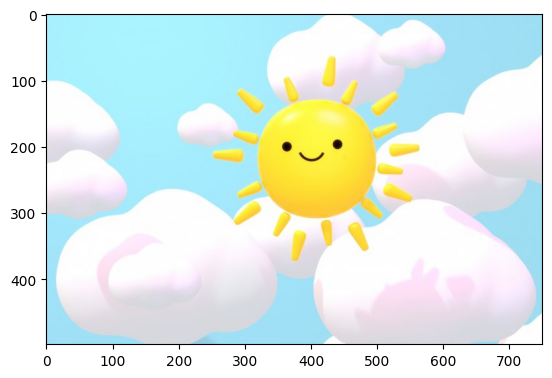

In [8]:
image = load("sun.jpg")
ans = model.predict(image)
maping = {0 : "Neutral", 1 : "Porn", 2 : "Sexy"}
new_ans = np.argmax(ans[0])
print(maping[new_ans])